In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

Note - `.tim`, and `.dat` files for timing are located under `data/` directories.

In [3]:
# load timing residual data
resid_dat = np.loadtxt("timing_residual.J1832-0911.dat", dtype = "str")
resids = resid_dat[:, 4].astype(float)
errs =   resid_dat[:, 5].astype(float)/1e6
freqs =  resid_dat[:, 3].astype(float)
times =  resid_dat[:, 2].astype(float)
telescopes = resid_dat[:, 6]

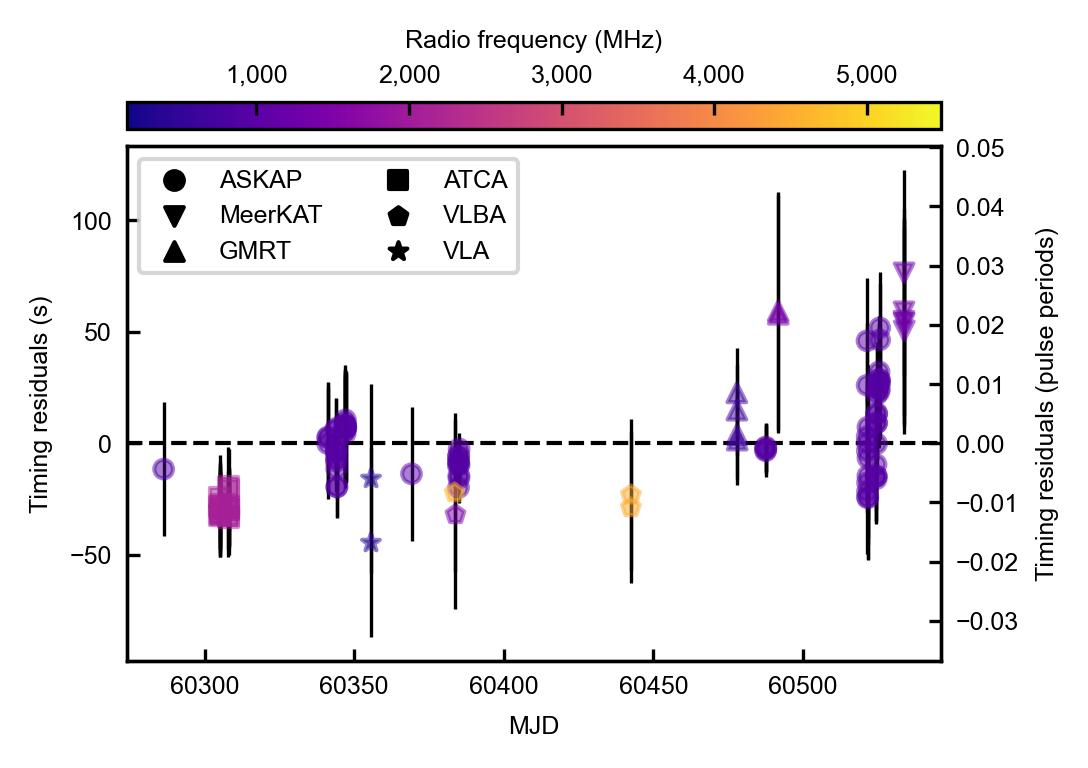

In [6]:

fig = plt.figure(figsize=(8.9*cm, 6.5*cm), dpi=300)
ax = fig.add_subplot(1, 1, 1)

markers = {
    "askap": "o", "meerkat": "v", "gmrt": "^", "atca": "s", 
    "vlba_C": "p", "vlba_L": "p", "vla": "*", "vlba": "p"
}
labels = {
    "askap": "ASKAP", "meerkat": "MeerKAT", "gmrt": "GMRT", "atca": "ATCA", 
    "vlba_C": "VLBA", "vlba_L": None, "vlba": "VLBA", "vla": "VLA"
}
plt.errorbar(
    times, resids, yerr=errs, 
    ecolor = 'k', markersize=0, fmt='o',zorder=100,
)
for key in markers:
    inds = telescopes == key
    
    im = plt.scatter(
        times[inds],resids[inds],c=(freqs[inds]),vmin=150.0, 
        vmax=1.2*np.max(freqs), cmap="plasma", s=20, zorder=10000,
        marker=markers[key], alpha=0.5, #label = labels[key], 
    )
    
ax.axhline(y=0, ls="--", color="k", lw=1)
    

pad = 0.03
cb = fig.colorbar(
    im, pad=pad, orientation='horizontal', fraction=0.1, location="top", aspect=30
)
cb.set_label("Radio frequency (MHz)")
cb.solids.set(alpha=1)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax2 = ax.twinx()
yl = ax.get_ylim()
F0 = 0.0003764722
P0 = 1.0/F0
yl_p = [i/P0 for i in yl]
ax2.set_ylim(yl_p[0], yl_p[1])
    

ax.set_xlabel("MJD", )
ax.set_ylabel("Timing residuals (s)", )
ax2.set_ylabel("Timing residuals (pulse periods)", )

#### plot legend... ####
for telescope in ["askap", "meerkat", "gmrt", "atca", "vlba", "vla"]:
    ax.scatter([], [], color="k", marker=markers[telescope], s=20, label=labels[telescope])
ax.legend(loc="upper left", ncol=2)

plt.savefig("timing_residuals.J1832-0911.pdf", bbox_inches="tight", dpi=300)
